# EX 1

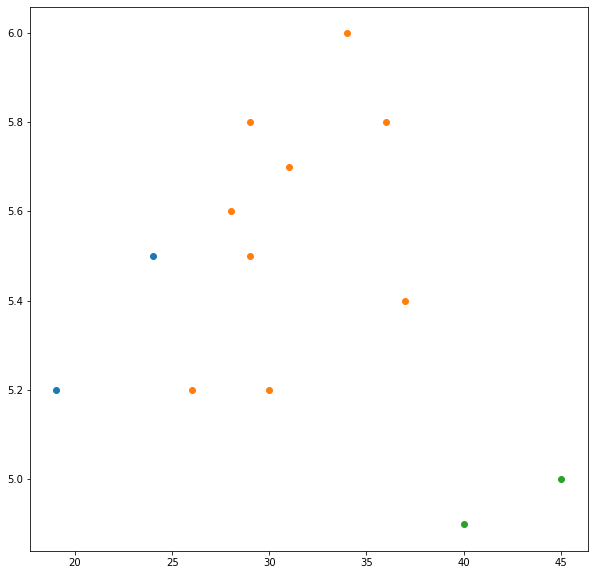

Accuracy: 0.5


array([1], dtype=int64)

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv('K-NN_Weight.csv')
df.head()

# we need to categorize the data by their Weight
# we will arbitrarily label every data with weight less than 50 as 0, 
# any data with weight less than 60 as 1
# any data with weight larger than 60 as 2

# make a copy of the dataframe
df_cat = df
# categorize by their weight
df_cat.loc[df['Weight']< 50, 'Weight'] = 0
df_cat.loc[(df['Weight'] >= 50) & (df['Weight'] < 65), 'Weight'] = 1
df_cat.loc[df['Weight'] >= 65, 'Weight'] = 2
df_cat

fig, ax = plt.subplots(figsize = (10,10))
df_zero = df_cat.loc[df_cat['Weight'] == 0]
df_one = df_cat.loc[df_cat['Weight'] == 1]
df_two = df_cat.loc[df_cat['Weight'] == 2]
ax.scatter(df_zero['Age'], df_zero['Height'])
ax.scatter(df_one['Age'], df_one['Height'])
ax.scatter(df_two['Age'], df_two['Height'])
#plt.ylim(4, 7)
plt.show()



X = df_cat.iloc[:, 0:2]
y = df_cat['Weight']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)


# we choose k = 3 here, due to the small number of data we have
# there isn't a k suitable for all. Generally we want to choose a small odd number.
# large k is generally more costy
knn_model = KNeighborsClassifier(n_neighbors = 3) 

knn_model.fit(X_train, y_train) # train our model to the data set we have. The training set is all the data points
y_pred = knn_model.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred))
knn_model.predict([(5.5, 30)])

# EX 2

In [1]:
# import everything first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


# We are going to use the Iris data sets from sklearn as our example
from sklearn import datasets
iris = datasets.load_iris()

# build a dataframe with the data
# first four columns are the features, the last column is the target that we want to predict
df = pd.DataFrame(iris.data, columns = ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])
df['class'] = iris.target
df.head()

print(iris.target_names) # these are the class names corresponding to their numeric label [0, 1, 2 ...]


# we let k = 5 first, which means choosing 5 nearest neighbors.
knn = KNeighborsClassifier(n_neighbors = 5) 

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:2], df['class'], random_state = 42)
X_train.head()

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# we should test how accurate our model is 

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

#Closer to 1 accuracy score means better prediction. Our model has an accuracy score of 0.815 approximately.

#Explore more about model
#We can try use different k values for our model. Check its accuracy with these k values.

#We will try k = 1 to k =20, as smaller k means noises have large influence and larger k means comuptation becomes expensive.

k_array = np.arange(1, 21, 2)

k_array

# we can change k value to 1 - 20, and check the accuracy score
# Then we can choose the optimized k value

for k in k_array:
    knn_ex = KNeighborsClassifier(n_neighbors = k)
    knn_ex.fit(X_train, y_train)
    ac = accuracy_score(y_test, knn_ex.predict(X_test))
    print(k)
    print(ac)
    
knn_1 = KNeighborsClassifier(n_neighbors = 1)
knn_1.fit(X_train, y_train)
y_pred1 = knn_1.predict(X_test)
print(accuracy_score(y_test, y_pred1))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

#This Confusion Matrix shows that we have 15 predicted class 0 are correct. 
#7 predicted class 1 are correct; 4 predicted class 1 which are actually class 2. 
#9 predicted class 2 are correct; 3 predicted class 2 which are actually class 1 .

# The confusion matrix when k = 1
confusion_matrix(y_test, y_pred1)

# The F1 score can be interpreted as a weighted average of the precision and recall, 
# where an F1 score reaches its best value at 1 and worst score at 0.
from sklearn.metrics import f1_score
f1_score(y_test, y_pred1, average = 'micro')

#Conclusion
#Our accuracy score got from finding the suitable k is between 0.7 to 0.8

['setosa' 'versicolor' 'virginica']
0.8157894736842105
1
0.7105263157894737
3
0.7631578947368421
5
0.8157894736842105
7
0.7631578947368421
9
0.8157894736842105
11
0.8157894736842105
13
0.7631578947368421
15
0.8157894736842105
17
0.7368421052631579
19
0.7894736842105263
0.7105263157894737


0.7105263157894737

In [2]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

#This Confusion Matrix shows that we have 15 predicted class 0 are correct. 
#7 predicted class 1 are correct; 4 predicted class 1 which are actually class 2. 
#9 predicted class 2 are correct; 3 predicted class 2 which are actually class 1 .

array([[15,  0,  0],
       [ 0,  7,  4],
       [ 0,  3,  9]], dtype=int64)

In [3]:
confusion_matrix(y_test, y_pred1)

array([[15,  0,  0],
       [ 0,  6,  5],
       [ 0,  6,  6]], dtype=int64)

# CA

The shape of indepedent variables :  (303, 7)
The shape of dependent variable:  (303,)


Maximum accuracy:- 0.8947368421052632 at K = 4
Minimum error:- 0.10526315789473684 at K = 4


K-Value based on Sqroot of sample size of 303
Accuracy of model at K =  17  is 0.868421052631579


K-Value of  4
Accuracy of model at K =  4  is 0.8421052631578947


K-Value of  5
Accuracy of model at K =  5  is 0.8947368421052632


Accuracy of Train Model is:  0.8634361233480177


Time Taken for training the dataset
Elapsed Time : 0.0 seconds


Time Taken for fitting and predicting the model
Elapsed Time : 0.003999948501586914 seconds


K-Value of  6
Accuracy of model at K =  6  is 0.8552631578947368


Changing number of features
With all features we can get an accuracy of 0.86 - k @ 4) However,Training data is 0.877(overfitting)
with 9 features we can get an accuracy of (0.78 - k @ 2) * Corr Threshold - 0.2
With 7 features we can get an accuracy of (0.857 - k @ 12) * Corr Threshold - 0.3
With 5 features 

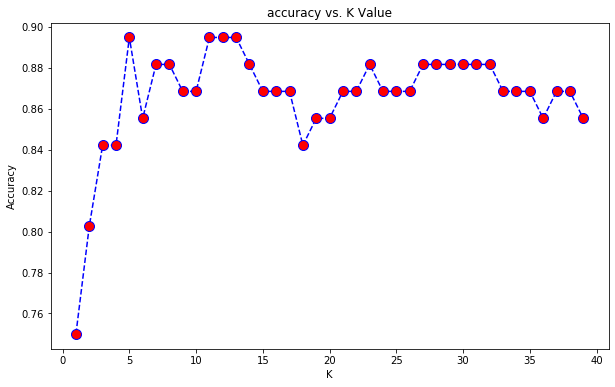

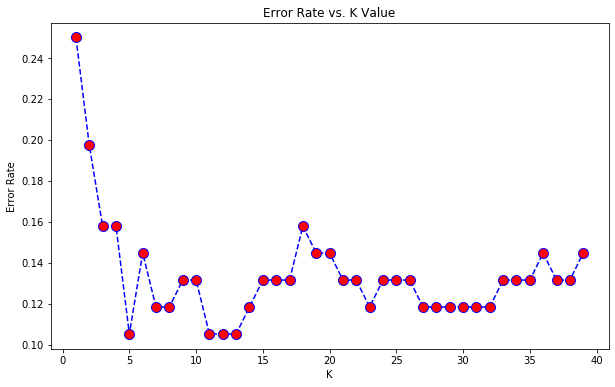

In [4]:

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import math
from sklearn import metrics
import time

#Importing Data
data = pd.read_csv("HeartAttack.csv")#Extracting data from dataset.
X= data[['Chest_Pain', 'Max_Heart_Rate', 'EI_Angina','Previous_Peak', 'Slope', 'Major_Vessels', 'Thalium_Stress_Test']].values
y= data['Output'].values

print("The shape of indepedent variables : ",X.shape)
print("The shape of dependent variable: ",y.shape)
print('\n')

start = time.time()

#Training the data with random state 42
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 42)

end = time.time()
trainElapsed=end-start

#Normalize the data with standard scalar

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#Max accuracy == K values
acc = []
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

#looking for the lowest error rate 

error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

print("\n")


#K Value of sqroot of sample size (303)

k = round(math.sqrt(303))
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("K-Value based on Sqroot of sample size of 303")
print("Accuracy of model at K = ",k," is",metrics.accuracy_score(y_test, y_pred))
print('\n')

#K-value of 4
k = 4
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("K-Value of ", k)
print("Accuracy of model at K = ",k," is",metrics.accuracy_score(y_test, y_pred))
print('\n')

start = time.time()
#K-value of 5
k = 5
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("K-Value of ",k)
print("Accuracy of model at K = ",k," is",metrics.accuracy_score(y_test, y_pred))
print('\n')

end = time.time()
fitElapsed=end-start
#evaluate on train dataset

y_tred = knn.predict(X_train)
print("Accuracy of Train Model is: ", metrics.accuracy_score(y_train,y_tred))
print('\n')

print("Time Taken for training the dataset")
print('Elapsed Time : {0} seconds'.format(trainElapsed))
print('\n')
print("Time Taken for fitting and predicting the model")
print('Elapsed Time : {0} seconds'.format(fitElapsed))
print('\n')

#K-value of 6
k = 6
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
best = metrics.accuracy_score(y_test, y_pred)
print("K-Value of ",k)
print("Accuracy of model at K = ",k," is",best)

print('\n')

print("Changing number of features")
print("With all features we can get an accuracy of 0.86 - k @ 4) However,Training data is 0.877(overfitting)")
print("with 9 features we can get an accuracy of (0.78 - k @ 2) * Corr Threshold - 0.2")
print("With 7 features we can get an accuracy of (0.857 - k @ 12) * Corr Threshold - 0.3")
print("With 5 features we can get an accuracy of 0.57 - k @ 7 * Corr Threshold - 0.35")
print("With 4 features we can get an accuracy of 0.80 - k @ 9) * Corr Threshold - 0.4")
print("\n")
print("Changing the Test_size on TTS(train_test_split), with 7 features")
print("test_size = 0.3, test accuracy = 86.8%, training accuracy of = 82.1%")
print("test_size = 0.25, test accuracy = 89.5%, training accuracy of = 86.3%")
print("test_size = 0.2, test accuracy = 90.2%, training accuracy of = 80.99%")

#Test size of 0.25 gives the less differences between test and training accuracy . so its much more balanced
#compared to the others. 